## Autoencoders

In [1]:
import h2o

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,7 days 2 hours 9 mins
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.1
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_yananli_b8uqhw
H2O cluster total nodes:,1
H2O cluster free memory:,1.215 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [4]:
url = "http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv"
iris = h2o.import_file(url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
train, test = iris.split_frame([0.8], seed = 123)

In [6]:
x = ["sepal_len", "sepal_wid", "petal_len", "petal_wid"]

In [7]:
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator

In [8]:
m_AE_4 = H2OAutoEncoderEstimator(
    hidden = [4],
    activation = "Tanh",
    epochs = 300,
    model_id = "m_AE_4",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0
)

%time m_AE_4.train(x, None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 46.7 ms, sys: 8.79 ms, total: 55.4 ms
Wall time: 522 ms


In [9]:
sh = m_AE_4.score_history()
sh.head()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2020-01-12 17:50:36,0.052 sec,0.00000 obs/sec,0.0,0,0.0,0.376876,0.142036
1,,2020-01-12 17:50:36,0.074 sec,6050 obs/sec,1.0,1,121.0,0.288871,0.083446
2,,2020-01-12 17:50:36,0.085 sec,8642 obs/sec,2.0,2,242.0,0.219376,0.048126
3,,2020-01-12 17:50:36,0.091 sec,11000 obs/sec,3.0,3,363.0,0.169505,0.028732
4,,2020-01-12 17:50:36,0.099 sec,12410 obs/sec,4.0,4,484.0,0.131797,0.017371


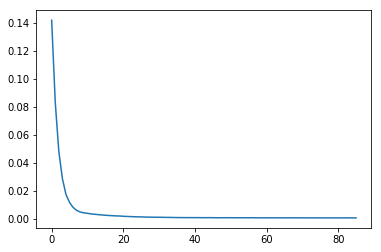

In [10]:
sh["training_mse"].plot()

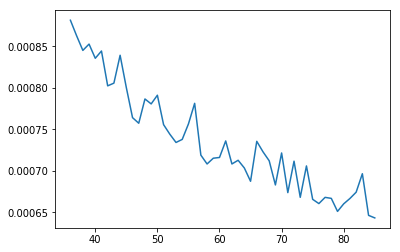

In [11]:
sh["training_mse"].tail(50).plot()

In [12]:
m_AE_4 = H2OAutoEncoderEstimator(
    hidden = [4],
    activation = "Tanh",
    epochs = 300,
    model_id = "m_AE_4",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15
)

%time m_AE_4.train(x, None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 247 ms, sys: 48.7 ms, total: 295 ms
Wall time: 2.44 s


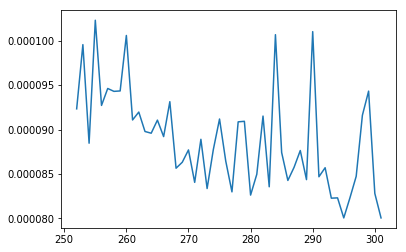

In [13]:
sh = m_AE_4.score_history()
sh["training_mse"].tail(50).plot()

In [14]:
m_AE_3 = H2OAutoEncoderEstimator(
    hidden = [3],
    activation = "Tanh",
    epochs = 300,
    model_id = "m_AE_3",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15
)

%time m_AE_3.train(x, None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 125 ms, sys: 23.3 ms, total: 149 ms
Wall time: 1.33 s


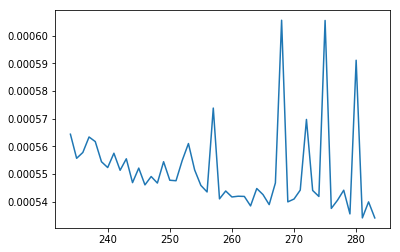

In [15]:
sh = m_AE_3.score_history()
sh["training_mse"].tail(50).plot()

In [16]:
m_AE_2 = H2OAutoEncoderEstimator(
    hidden = [2],
    activation = "Tanh",
    epochs = 300,
    model_id = "m_AE_2",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15
)

%time m_AE_2.train(x, None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 56.6 ms, sys: 11.1 ms, total: 67.7 ms
Wall time: 674 ms


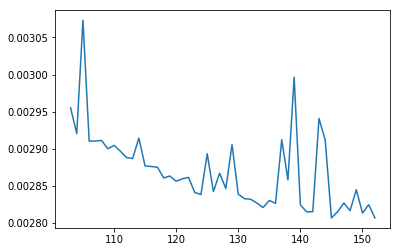

In [17]:
sh = m_AE_2.score_history()
sh["training_mse"].tail(50).plot()

In [18]:
m_AE_1 = H2OAutoEncoderEstimator(
    hidden = [1],
    activation = "Tanh",
    epochs = 300,
    model_id = "m_AE_1",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15
)

%time m_AE_1.train(x, None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 77.3 ms, sys: 6.99 ms, total: 84.3 ms
Wall time: 307 ms


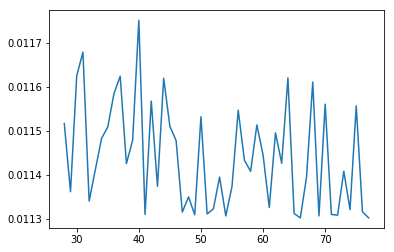

In [19]:
sh = m_AE_1.score_history()
sh["training_mse"].tail(50).plot()

## Multi-layer autoencoder

In [20]:
m_AE_5_3_5 = H2OAutoEncoderEstimator(
    hidden = [5,3,5],
    activation = "Tanh",
    epochs = 300,
    model_id = "m_AE_5_3_5",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15
)

%time m_AE_5_3_5.train(x, None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 52.3 ms, sys: 10.2 ms, total: 62.6 ms
Wall time: 674 ms


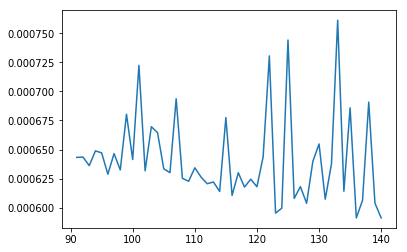

In [21]:
sh = m_AE_5_3_5.score_history()
sh["training_mse"].tail(50).plot()

## Stacked autoencoder: Build on the m_AE_3 model, that was made earlier

In [22]:
train_AE_3 = m_AE_3.deepfeatures(train, 0) # 0 means layer 1 

deepfeatures progress: |██████████████████████████████████████████████████| 100%


In [23]:
train_AE_3.dim

[121, 3]

In [24]:
train_AE_3

DF.L1.C1,DF.L1.C2,DF.L1.C3
-0.115323,-0.0383541,0.543185
-0.175569,0.289994,0.511525
-0.214167,0.156084,0.547253
-0.235472,0.218162,0.533832
-0.134241,-0.108908,0.557802
-0.0691726,-0.326284,0.510476
-0.246242,0.00120141,0.549348
-0.139065,0.026724,0.535204
-0.0399487,-0.166694,0.536572
-0.181297,0.0208616,0.542104


In [25]:
m_AE_3x3 = H2OAutoEncoderEstimator(
    hidden = [3],
    activation = "Tanh",
    epochs = 300,
    model_id = "m_AE_3x3",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15
)

%time m_AE_3x3.train([0,1,2], None, train_AE_3)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 74.5 ms, sys: 13.7 ms, total: 88.2 ms
Wall time: 889 ms


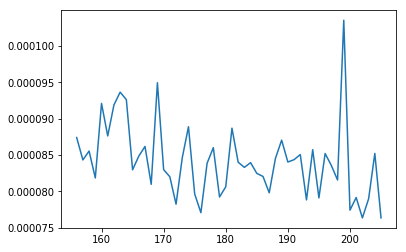

In [26]:
sh = m_AE_3x3.score_history()
sh["training_mse"].tail(50).plot()

## Anomalies

In [27]:
x = ["sepal_len", "sepal_wid", "petal_len", "petal_wid", "class"]

In [28]:
m_anomaly16 = H2OAutoEncoderEstimator(
    hidden = [16],
    activation = "Tanh",
    epochs = 300,
    model_id = "m_anomaly16",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15
)

%time m_anomaly16.train(x, None, iris)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 59.4 ms, sys: 11 ms, total: 70.4 ms
Wall time: 681 ms


In [29]:
anomalies = m_anomaly16.anomaly(iris).cbind(iris).as_data_frame()

In [30]:
s = anomalies.sort_values("Reconstruction.MSE", ascending = False)

In [31]:
s.head()

,Reconstruction.MSE,sepal_len,sepal_wid,petal_len,petal_wid,class
118,0.000306,7.7,2.6,6.9,2.3,Iris-virginica
41,0.000256,4.5,2.3,1.3,0.3,Iris-setosa
131,0.000249,7.9,3.8,6.4,2.0,Iris-virginica
50,0.000150,7.0,3.2,4.7,1.4,Iris-versicolor
114,0.000141,5.8,2.8,5.1,2.4,Iris-virginica


In [32]:
s.tail()

,Reconstruction.MSE,sepal_len,sepal_wid,petal_len,petal_wid,class
102,0.000003,7.1,3.0,5.9,2.1,Iris-virginica
120,0.000003,6.9,3.2,5.7,2.3,Iris-virginica
99,0.000003,5.7,2.8,4.1,1.3,Iris-versicolor
25,0.000002,5.0,3.0,1.6,0.2,Iris-setosa
30,0.000002,4.8,3.1,1.6,0.2,Iris-setosa


## Kmeans

In [33]:
from h2o.estimators.kmeans import H2OKMeansEstimator

In [34]:
m = H2OKMeansEstimator(k = 5)

In [36]:
train.head()

sepal_len,sepal_wid,petal_len,petal_wid,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5,3.4,1.5,0.2,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa


In [37]:
m.train(x = range(4), training_frame = train)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [38]:
p = m.predict(train)

kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [41]:
p

predict
3
3
3
3
3
2
3
3
2
3


In [42]:
m = H2OKMeansEstimator(k = 5, estimate_k = True)

In [43]:
m.train(x = range(4), training_frame = train)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [44]:
p = m.predict(train)

kmeans prediction progress: |█████████████████████████████████████████████| 100%


## Handling missing data: random forest, GBM: NA is extra category; deep learning, GLM: missing_values_handling Skip or MeanImputation (skip is to skip rows)

In [45]:
# Throw it out:
# Delete a column
# Delete a row: missing_values_handling = "Skip"

In [46]:
# Make it up:
# constant value
# Mean: missing_values_handling = "MeanImputation"
# Median: see h2o.impute()
# Use correlated columns
# get more data

In [47]:
url = "http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip"
data = h2o.import_file(url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [48]:
train, valid, test = data.split_frame([0.8, 0.1], seed = 123)

### Examine the CarrierDelay

In [49]:
train.group_by('Year').mean(col = "CarrierDelay", na = 'rm').get_frame().as_data_frame()

,Year,mean_CarrierDelay
0,1987,NaN
1,1988,NaN
2,1989,NaN
3,1990,NaN
4,1991,NaN
5,1992,NaN
6,1993,NaN
7,1994,NaN
8,1995,NaN
9,1996,NaN


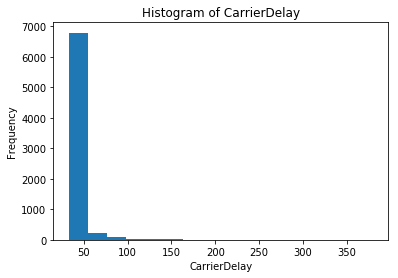

In [50]:
train['CarrierDelay'].hist()

In [51]:
train['CarrierDelay'].table()

CarrierDelay,Count
0,5874
1,44
2,42
3,52
4,47
5,57
6,55
7,51
8,61
9,57


In [52]:
train['CarrierDelay'].table().tail()

CarrierDelay,Count
192,2
200,1
220,1
254,1
258,1
266,1
277,1
282,1
354,1
369,1


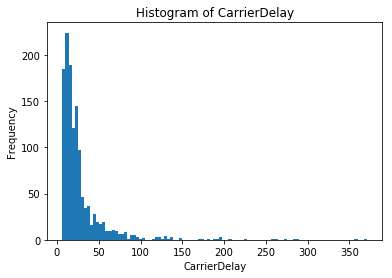

In [57]:
train[train['CarrierDelay'] >= 1, 'CarrierDelay'].hist(breaks = 100)

### Is it correlated with fields we do have values for?

In [58]:
train['CarrierDelay'].cor(train['DepDelay'], na_rm = True)

0.5386739673581036

In [59]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [60]:
y = 'CarrierDelay'
ignoreFields = ["TailNum"]
x = [i for i in train.names if i not in ignoreFields]

In [61]:
bad_rowsT = train[y].isna()
bad_rowsV = valid[y].isna()

In [71]:
train_good = train[bad_rowsT.logical_negation(), :]
valid_good = valid[bad_rowsV.logical_negation(), :]
train_bad = train[bad_rowsT, :]
valid_bad = valid[bad_rowsV, :]

In [73]:
print("train = %d/%d, valid = %d/%d" % (train_good.nrows, train_bad.nrows, valid_good.nrows, valid_bad.nrows))

train = 7162/28093, valid = 903/3369


In [74]:
# m_GBM_g = H2OGradientBoostingEstimator()  # gives -11 to +56
m_GBM_g = H2OGradientBoostingEstimator(distribution = "gamma")
m_GBM_g.train(x, y, train_good, validation_frame = valid_good)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [77]:
new_values = m_GBM_g.predict(train_bad).floor()

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [78]:
new_values.columns = [y]

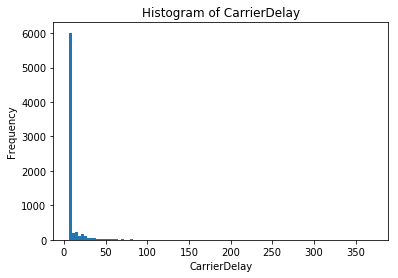

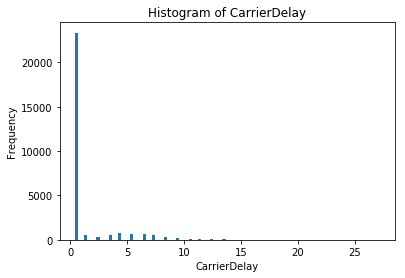

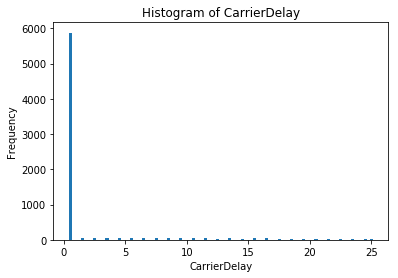

In [79]:
train_good[y].hist(100)
new_values.hist(100)
train_good[train_good[y] <= 25, y].hist(100)

In [80]:
train_good[y].describe()

Rows:7162
Cols:1




,CarrierDelay
type,int
mins,0.0
mean,4.07693381737
maxs,369.0
sigma,16.4332599676
zeros,5874
missing,0
0,0.0
1,0.0
2,0.0


In [81]:
new_values.describe()

Rows:28093
Cols:1




,CarrierDelay
type,int
mins,0.0
mean,0.913786352472
maxs,27.0
sigma,2.40033570782
zeros,23335
missing,0
0,3.0
1,0.0
2,5.0


In [82]:
train_bad[y] = new_values

In [83]:
train2 = train_good.rbind(train_bad)

In [84]:
train2.describe()
train.describe()

Rows:35255
Cols:31




,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
type,int,int,int,int,int,int,int,int,enum,int,enum,int,int,int,int,int,enum,enum,int,int,int,int,enum,int,int,int,int,int,int,enum,enum
mins,1987.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,,1.0,,16.0,17.0,14.0,-63.0,-16.0,,,11.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,
mean,1997.4832506,1.40666572117,14.6143242093,3.81313288895,1345.74679422,1313.06050206,1504.35927707,1485.44311445,,817.494936888,,124.721993878,124.962888353,114.217873778,9.24891415246,9.96199587101,,,729.482682262,5.38269840561,14.1358906801,0.0245071621047,,0.00243937030208,1.55637498227,0.272409941357,4.86191008098,0.016615470539,7.76556827702,,
maxs,2008.0,10.0,31.0,7.0,2400.0,2359.0,2400.0,2359.0,,3949.0,,475.0,437.0,367.0,470.0,396.0,,,3365.0,128.0,170.0,1.0,,1.0,369.0,201.0,323.0,14.0,373.0,,
sigma,6.33622763659,1.86941531195,9.17189427475,1.9039966823,465.722077132,476.996763279,484.8195126,493.283756476,,774.243511766,,73.8729531104,73.3475048712,69.4209005243,29.4445100514,26.0710100875,,,577.920240937,4.20185021329,9.67475611521,0.154619659919,,0.0493304044172,7.81443552929,4.19839523881,18.5641940747,0.39388971493,23.3842644095,,
zeros,0,0,0,0,0,460,0,460,,0,,0,0,0,1198,5173,,,0,493,443,34391,,35169,29209,7085,5915,7147,5695,,
missing,0,0,0,0,864,0,950,0,0,0,23,950,10,13357,950,864,0,0,31,12864,12862,0,7805,0,0,28093,28093,28093,28093,0,0
0,2004.0,1.0,12.0,1.0,623.0,630.0,901.0,915.0,UA,462.0,N805UA,98.0,105.0,80.0,-14.0,-7.0,ORD,CLT,599.0,7.0,11.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,NO,NO
1,2004.0,1.0,13.0,2.0,621.0,630.0,911.0,915.0,UA,462.0,N851UA,110.0,105.0,78.0,-4.0,-9.0,ORD,CLT,599.0,16.0,16.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,NO,NO
2,2004.0,1.0,14.0,3.0,633.0,630.0,920.0,915.0,UA,462.0,N436UA,107.0,105.0,88.0,5.0,3.0,ORD,CLT,599.0,4.0,15.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,YES,YES


Rows:35255
Cols:31




,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
type,int,int,int,int,int,int,int,int,enum,int,enum,int,int,int,int,int,enum,enum,int,int,int,int,enum,int,int,int,int,int,int,enum,enum
mins,1987.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,,1.0,,16.0,17.0,14.0,-63.0,-16.0,,,11.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,
mean,1997.4832506,1.40666572117,14.6143242093,3.81313288895,1345.74679422,1313.06050206,1504.35927707,1485.44311445,,817.494936888,,124.721993878,124.962888353,114.217873778,9.24891415246,9.96199587101,,,729.482682262,5.38269840561,14.1358906801,0.0245071621047,,0.00243937030208,4.07693381737,0.272409941357,4.86191008098,0.016615470539,7.76556827702,,
maxs,2008.0,10.0,31.0,7.0,2400.0,2359.0,2400.0,2359.0,,3949.0,,475.0,437.0,367.0,470.0,396.0,,,3365.0,128.0,170.0,1.0,,1.0,369.0,201.0,323.0,14.0,373.0,,
sigma,6.33622763659,1.86941531195,9.17189427475,1.9039966823,465.722077132,476.996763279,484.8195126,493.283756476,,774.243511766,,73.8729531104,73.3475048712,69.4209005243,29.4445100514,26.0710100875,,,577.920240937,4.20185021329,9.67475611521,0.154619659919,,0.0493304044172,16.4332599676,4.19839523881,18.5641940747,0.39388971493,23.3842644095,,
zeros,0,0,0,0,0,460,0,460,,0,,0,0,0,1198,5173,,,0,493,443,34391,,35169,5874,7085,5915,7147,5695,,
missing,0,0,0,0,864,0,950,0,0,0,23,950,10,13357,950,864,0,0,31,12864,12862,0,7805,0,28093,28093,28093,28093,28093,0,0
0,1987.0,10.0,14.0,3.0,741.0,730.0,912.0,849.0,PS,1451.0,NA,91.0,79.0,nan,23.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES
1,1987.0,10.0,15.0,4.0,729.0,730.0,903.0,849.0,PS,1451.0,NA,94.0,79.0,nan,14.0,-1.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,NO
2,1987.0,10.0,17.0,6.0,741.0,730.0,918.0,849.0,PS,1451.0,NA,97.0,79.0,nan,29.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES
